## Unsupervised Learning in Python

### NOTE: The following link shown in the first part of this course is wrong:
https://scikitlearn.org/stable/modules/generated/sklearn.datasets.load_iris.html

### This is the safe place to get the iris data set
https://archive.ics.uci.edu/dataset/53/iris

This notebook is about implementation in Python/sklearn. It assumes prior knowledge of the theory behind each analysis.

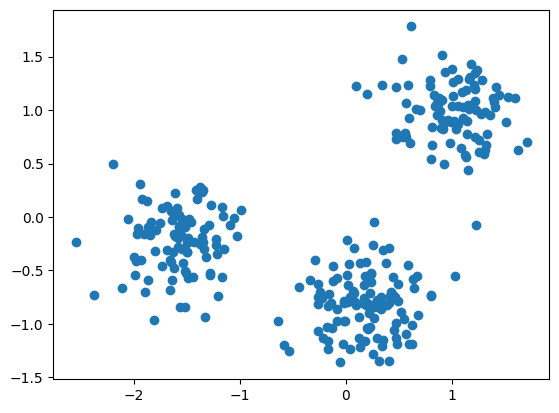

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

points = np.loadtxt('./data/points01.txt', delimiter=',')
xs = points[:, 0]
ys = points[:, 1]
plt.scatter(xs, ys)

In [2]:
new_points = np.loadtxt('./data/points02.txt', delimiter=',')

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[2 0 1 2 0 2 0 0 0 1 2 0 0 1 1 0 1 1 0 0 1 0 2 0 2 1 0 1 1 2 2 0 0 0 1 2 0
 0 2 0 1 2 2 1 2 0 1 1 0 0 0 0 1 1 2 2 1 1 1 2 2 0 0 0 2 0 1 0 2 1 2 2 2 0
 2 1 1 2 0 1 2 1 2 0 1 0 1 2 0 0 0 2 0 0 2 1 1 1 1 2 0 2 1 1 2 2 0 2 1 1 2
 1 1 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 1 1 0 1 0 1 2 0 2 2 0 1 2 0 2 2 1 0 0 2
 1 2 1 0 2 1 1 2 1 0 0 1 0 1 1 0 0 2 0 0 1 2 1 2 2 0 2 0 0 2 2 1 2 2 2 1 0
 0 2 1 2 1 1 0 0 0 2 0 0 0 1 1 2 0 2 2 2 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 2 1 2 2 1 2 1 2 1 0 0 1 0 0 0 1 2 2 1 0 0 1 0 1 1 0 1 1 2 1 2 2 2 0 1
 1 1 2 0 2 1 2 1 1 0 2 2 2 1 0 0 0 2 0 1 1 0 2 2 1 2 2 1 2 0 2 1 1 1 1 0 1
 1 0 0 2]


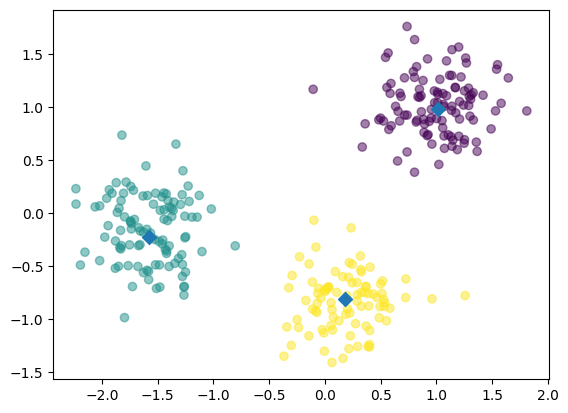

In [3]:
# Assign the columns of new_points: xs and ys
xs = new_points[:, 0]
ys = new_points[:, 1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

## How many clusters of grain?

A good number of clusters for a dataset using the k-means inertia graph is in the "elbow" of the cureve. Let's say that we are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

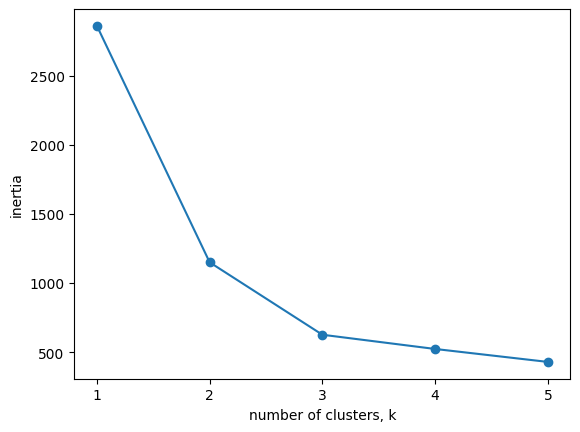

In [4]:
samples = np.loadtxt('./data/seeds.csv', delimiter=',')
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Evaluating the grain clustering

From the inertia plot above, 3 looks like a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". Let's look at clustering the grain samples into three clusters, and comparing those clusters to the grain varieties using a cross-tabulation.

In [5]:
varieties = pd.read_csv('./data/seed_varieties.txt', header=None, names=['variety'])
varieties = list(varieties['variety'])
print(len(varieties))

210


In [6]:
# KMeans model with 3 clusters
model = KMeans(n_clusters=3)

# fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)  # like running .fit() followed by .predict()

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  'Canadian wheat'  'Kama wheat'  'Rosa wheat'
labels                                                 
0                         0             1            60
1                        70             5             0
2                         0            64            10


## Piedmont wines dataset
 
+ 178 samples from 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
+ Features measure chemical composition e.g. alcohol content
+ Visual properties like "color intensity"



In [7]:
wine_data = pd.read_csv('./data/wine.csv')
wine_data.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine_no_labels = wine_data.iloc[:, 2:]
wine_labels = wine_data.loc[:, ['class_name']]
wine_no_labels.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
model_wine = KMeans(n_clusters=3)
labels = model.fit_predict(wine_no_labels)
varieties = wine_labels['class_name'].values
df = pd.DataFrame({
    'labels': labels,
    'varieties': varieties
})

ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)  # poor separation

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20


## Feature variances

+ The wine features have very different variances
+ Can use `StandardScalar` to transform features to have mean = 0, and variance = 1 (standardize)
+ Feature standardization improves clustering



In [10]:
# use pipeline to combine multiple steps
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(wine_no_labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [11]:
labels_std = pipeline.predict(wine_no_labels)
ct_std = pd.crosstab(labels_std, df['varieties'])
print(ct_std)  # much better separation!

varieties  Barbera  Barolo  Grignolino
row_0                                 
0               48       0           3
1                0      59           3
2                0       0          65


## Scaling fish data for clustering

We are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, we'll need to standardize these features first. Here, we'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://ww2.amstat.org/publications/jse/jse_data_archive.htm).

In [12]:
fish_data = pd.read_csv('./data/fish.csv', header=None)
fish_data.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [13]:
fish_samples = fish_data.iloc[:, 1:].values
fish_species = fish_data.iloc[:, 0]

In [14]:
# Create scaler
scaler = StandardScaler()

# Create KMeans instance
kmeans = KMeans(n_clusters=4)

# Create pipeline
pipeline = make_pipeline(scaler, kmeans)

In [15]:
# Fit the pipeline to samples
pipeline.fit(fish_samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(fish_samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({
    'labels': labels,
    'species': fish_species
})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1           33     0      1      0
2            0     0      0     13
3            1     0     19      1


## Clustering stocks using KMeans

We'll now cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). We are given a NumPy array of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, we'll include a `Normalizer` at the beginning of our pipeline. The `Normalizer` will separately transform each company's stock price to a relative scale before the clustering begins.

Note that `Normalizer()` is different to `StandardScaler()`, which we used earlier. While `StandardScaler()` standardizes features (such as the features of the fish data) by removing the mean and scaling to unit variance, `Normalizer()` rescales each sample - here, each company's stock price - independently of the other. 

In [16]:
stock_data = np.genfromtxt('./data/company-stock-movements-2010-2015-incl.csv', delimiter=',', skip_header=1)
movements = stock_data[:, 1:]
companies = np.array(pd.read_csv('./data/company-stock-movements-2010-2015-incl.csv', usecols=[0])).flatten()
print(companies)
movements

['Apple' 'AIG' 'Amazon' 'American express' 'Boeing' 'Bank of America'
 'British American Tobacco' 'Canon' 'Caterpillar' 'Colgate-Palmolive'
 'ConocoPhillips' 'Cisco' 'Chevron' 'DuPont de Nemours' 'Dell' 'Ford'
 'General Electrics' 'Google/Alphabet' 'Goldman Sachs' 'GlaxoSmithKline'
 'Home Depot' 'Honda' 'HP' 'IBM' 'Intel' 'Johnson & Johnson'
 'JPMorgan Chase' 'Kimberly-Clark' 'Coca Cola' 'Lookheed Martin'
 'MasterCard' 'McDonalds' '3M' 'Microsoft' 'Mitsubishi' 'Navistar'
 'Northrop Grumman' 'Novartis' 'Pepsi' 'Pfizer' 'Procter Gamble'
 'Philip Morris' 'Royal Dutch Shell' 'SAP' 'Schlumberger' 'Sony'
 'Sanofi-Aventis' 'Symantec' 'Toyota' 'Total'
 'Taiwan Semiconductor Manufacturing' 'Texas instruments' 'Unilever'
 'Valero Energy' 'Walgreen' 'Wells Fargo' 'Wal-Mart' 'Exxon' 'Xerox'
 'Yahoo']


array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

### NOTE: Unless you set a random seed, you're going to get different results every time you run the next couple of cells.

In [17]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [18]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(['labels']))

    labels                           companies
29       0                     Lookheed Martin
36       0                    Northrop Grumman
4        0                              Boeing
35       1                            Navistar
15       1                                Ford
48       2                              Toyota
30       2                          MasterCard
20       2                          Home Depot
54       2                            Walgreen
34       3                          Mitsubishi
58       3                               Xerox
50       3  Taiwan Semiconductor Manufacturing
51       3                   Texas instruments
22       3                                  HP
45       3                                Sony
17       3                     Google/Alphabet
21       3                               Honda
7        3                               Canon
11       3                               Cisco
53       4                       Valero Energy
32       4   

## Eurovision scoring dataset

The Eurovision dataset provide with the course (shown below) was not the same one used in the video lectures. The following reference to the data:

https://www.eurovision.tv/page/results redirected to: https://eurovision.tv/history/full-split-results

On this page, the following line contained a link:

*For your convenience, you can [download the full split results](https://we.tl/XUDj5T4jUM) of the Eurovision Song Contest 2014, 2015 and 2016 in Excel format.*

Unfortunately, this link did not provide direct access to the data from the ***wetransfer.com*** site.

Below is the results reported in the video lectures using ***complete linkage***:

<img src="eurovison_2016_results.png">

In [19]:
df = pd.read_csv('./data/eurovision-2016.csv')
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


## Hierarchical clustering of the grain data

The SciPy `linkage()` function performs hierarchical clustering on an array of samples. We can use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.

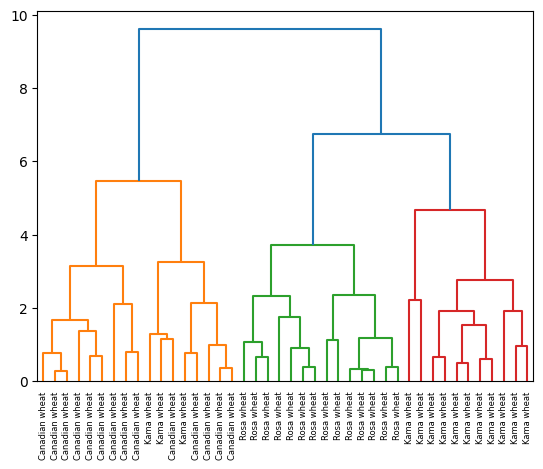

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

wheat_samples = np.loadtxt('./data/wheat_samples.txt', delimiter=',')
wheat_samples_varieties = np.loadtxt('./data/wheat_sample_varieties.txt', dtype='str', delimiter=',')

# Calculate the linkage: mergings
wheat_mergings = linkage(wheat_samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(wheat_mergings,
           labels=wheat_samples_varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

## Hierarchies of stocks

Earlier, we used k-means clustering to cluster companies according to their stock price movements. Now, we'll perform hierarchical clustering of the companies. With our NumPy array of price movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so we'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`.

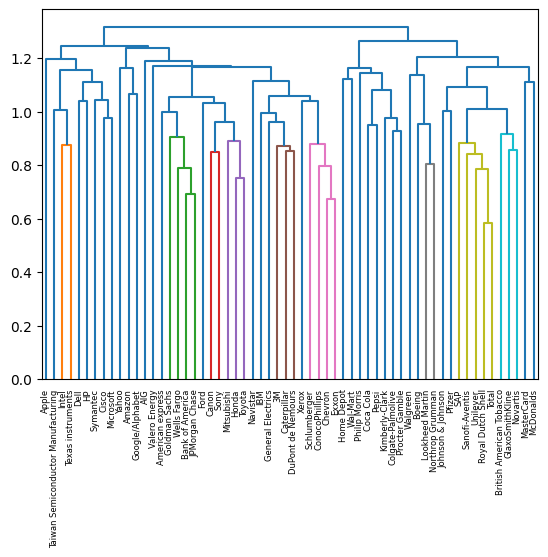

In [21]:
# use normalize (instead of Normalize like last time)
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

## Different linkage, different hierarchical clustering! Eurovision revisited

In this section, we'll explore hierarchical clustering of the voting countries at the Eurovision song contest using 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

Because the data could not be obtained from the references provided, it was extracted from the exercise into files which are read in the next cell.

In [22]:
euro_samples = np.loadtxt('./data/eurovision_2016_samples.txt', delimiter=',')
euro_country_names = np.loadtxt('./data/eurovision_2016_country_names.txt', dtype='str', delimiter=',')
print(euro_samples)
print(euro_country_names)

[[ 2. 12.  0. ...  0.  6.  0.]
 [12.  0.  4. ...  0. 10.  0.]
 [ 0. 12.  3. ...  0.  8.  4.]
 ...
 [ 8.  5.  6. ... 12.  7.  0.]
 [ 7.  4.  0. ...  0. 12.  0.]
 [ 0.  6.  0. ...  0.  5. 12.]]
['Albania' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Belarus'
 'Belgium' 'Bosnia & Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'F.Y.R. Macedonia' 'Finland'
 'France' 'Georgia' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Latvia' 'Lithuania' 'Malta' 'Moldova' 'Montenegro'
 'Norway' 'Poland' 'Russia' 'San Marino' 'Serbia' 'Slovenia' 'Spain'
 'Sweden' 'Switzerland' 'The Netherlands' 'Ukraine' "United Kingdom'"]


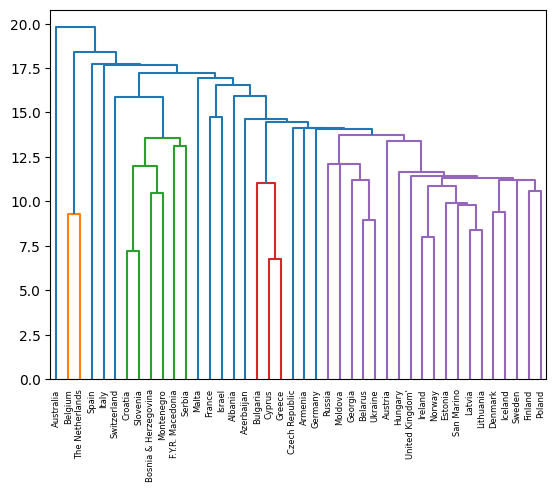

In [23]:
# necessary imports were done in earlier cells above
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(euro_samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=euro_country_names,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

## Extracting the cluster labels

From the dendrogram in the ***Hierarchical clustering of the grain data*** section, we can see that the intermediate clustering of the grain samples at height 6 is 3 clusters. Here, we'll use the `fcluster()` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

We'll use  the objects already built in cell 20 above.

In [24]:
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(wheat_mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': wheat_samples_varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'], )

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


## t-SNE in sklearn

+  t-SNE = "t-distributed stochastic neighbor embedding"
+  Maps samples to 2D space (or 3D)
+  Map approximately preserves nearness of samples

### t-SNE on Iris data set

In [25]:
df_iris = pd.read_csv('./data/iris.data', header=None)
df_iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
print(df_iris['class'].value_counts())
df_iris.head()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
iris_features = df_iris.iloc[:, :-1]
iris_labels = list(df_iris.iloc[:, -1])
species = [2 if x == "Iris-virginica" else
           1 if x == "Iris-versicolor" else
           0 for x in iris_labels]

# species = iris_labels.replace({"Iris-setosa": 0,
#                                "Iris-versicolor": 1,
#                                "Iris-virginica": 2})

samples = iris_features.values
print(samples[:5, :])
print(species[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0, 0, 0, 0, 0]


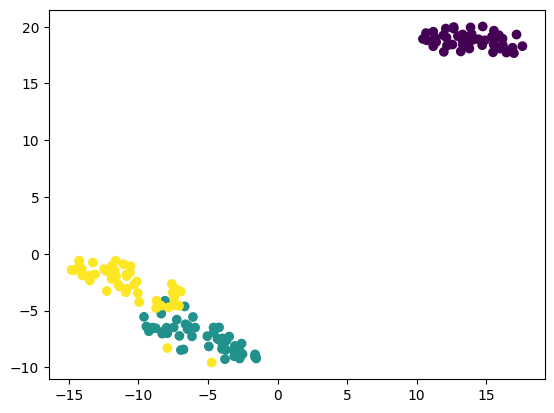

In [27]:
from sklearn.manifold import TSNE 
model = TSNE(learning_rate=100)  
transformed = model.fit_transform(samples) 
xs = transformed[:,0] 
ys = transformed[:,1] 
plt.scatter(xs, ys, c=species) 
plt.show() 

## A t-SNE map of the stock market

t-SNE can provide great visualizations when the individual samples can be labeled. Here, we'll apply t-SNE to the company stock price data we worked with earlier. A scatter plot of the resulting t-SNE features, labeled by the company names, will give us a map of the stock market.

In [28]:
normalized_movements = np.loadtxt('./data/normalized_movements.txt')
print(normalized_movements.shape)
normalized_movements

(60, 963)


array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

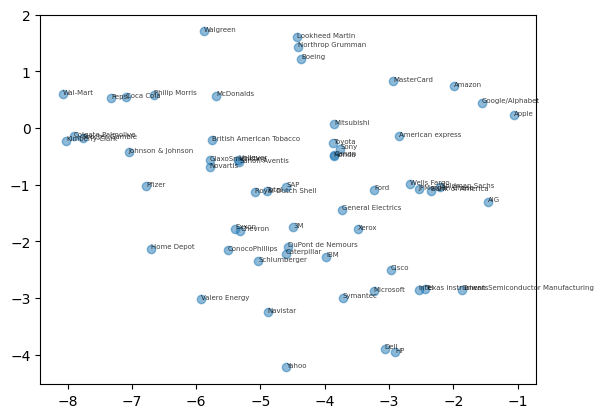

In [29]:
model = TSNE(learning_rate=50)

# apply fit_transform to normalized_movements
tsne_features = model.fit_transform(normalized_movements)

# select the 0th feature
xs = tsne_features[:, 0]

# select the 1th feature
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()